# Two showers sideband

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import localSettings as ls
print(ls.main_path)

/home/nic/Dropbox/MicroBooNE/PELEE/


In [5]:
main_path = ls.main_path
sys.path.append(main_path)

In [6]:
SHRCALIBFACTOR = 1.00

In [7]:
# USING BDT?
USEBDT = True

In [8]:
# cale to MCC8 CV?
MCC8WEIGHTS = False

In [9]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [10]:
fold = ls.fold
tree = "NeutrinoSelectionFilter"

R3BNB = 'data_bnb_mcc9.1_v08_00_00_25_reco2_G1_beam_good_reco2_1e19'
R3EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_G_all_reco2'
R3NU  = 'prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2'
R3NUE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2'
R3DRT = 'prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2'
R3NCPI0  = 'prodgenie_nc_pi0_uboone_overlay_mcc9.1_v08_00_00_26_run3_G_reco2'
R3CCPI0  = 'prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run3_G_reco2'
R3CCNOPI = 'prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run3_reco2_reco2'
R3CCCPI  = 'prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run3_reco2_reco2'
R3NCNOPI = 'prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_new_run3_reco2_reco2'
R3NCCPI  = 'prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_New_run3_reco2_reco2'

#ls.ntuple_path = "/Users/cerati/Notebooks/PELEE/root_files/0218/"

ur3mc = uproot.open(ls.ntuple_path+ls.RUN3+R3NU+ls.APPEND+".root")[fold][tree]
ur3ncpi0 = uproot.open(ls.ntuple_path+ls.RUN3+R3NCPI0+ls.APPEND+".root")[fold][tree]
ur3ccpi0 = uproot.open(ls.ntuple_path+ls.RUN3+R3CCPI0+ls.APPEND+".root")[fold][tree]
ur3nue = uproot.open(ls.ntuple_path+ls.RUN3+R3NUE+ls.APPEND+".root")[fold][tree]
ur3data = uproot.open(ls.ntuple_path+ls.RUN3+R3BNB+ls.APPEND+".root")[fold][tree]
ur3ext = uproot.open(ls.ntuple_path+ls.RUN3+R3EXT+ls.APPEND+".root")[fold][tree]
ur3dirt = uproot.open(ls.ntuple_path+ls.RUN3+R3DRT+ls.APPEND+".root")[fold][tree]
ur3lee = uproot.open(ls.ntuple_path+ls.RUN3+R3NUE+ls.APPEND+".root")[fold][tree]
ur3ccnopi = uproot.open(ls.ntuple_path+ls.RUN3+R3CCNOPI+ls.APPEND+".root")[fold][tree]
ur3cccpi = uproot.open(ls.ntuple_path+ls.RUN3+R3CCCPI+ls.APPEND+".root")[fold][tree]
ur3ncnopi = uproot.open(ls.ntuple_path+ls.RUN3+R3NCNOPI+ls.APPEND+".root")[fold][tree]
ur3nccpi = uproot.open(ls.ntuple_path+ls.RUN3+R3NCCPI+ls.APPEND+".root")[fold][tree]

R2NU = "prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run2_reco2_D1D2_reco2"
R2NUE = "prodgenie_bnb_intrinsic_nue_overlay_run2_v08_00_00_35_run2a_reco2_reco2"

ur2mc = uproot.open(ls.ntuple_path+ls.RUN2+R2NU+ls.APPEND+".root")[fold][tree]
ur2nue = uproot.open(ls.ntuple_path+ls.RUN2+R2NUE+ls.APPEND+".root")[fold][tree]
ur2lee = uproot.open(ls.ntuple_path+ls.RUN2+R2NUE+ls.APPEND+".root")[fold][tree]

R1BNB = 'data_bnb_mcc9.1_v08_00_00_25_reco2_C1_beam_good_reco2_5e19'
#R1EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_C_all_reco2'
R1EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_C1_C2_D1_D2_E1_E2_all_reco2' #Run1 + Run2
R1NU  = 'prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run1_reco2_reco2'
R1NUE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2'
R1DRT = 'prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2'
R1NCPI0  = 'prodgenie_nc_pi0_uboone_overlay-v08_00_00_26_run1_reco2_reco2'
R1CCPI0  = 'prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run1_reco2'
R1CCNOPI = 'prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run1_reco2_reco2'
R1CCCPI  = 'prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'
R1NCNOPI = 'prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'
R1NCCPI  = 'prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'
    
ur1mc = uproot.open(ls.ntuple_path+ls.RUN1+R1NU+ls.APPEND+".root")[fold][tree]
ur1ncpi0 = uproot.open(ls.ntuple_path+ls.RUN1+R1NCPI0+ls.APPEND+".root")[fold][tree]
ur1ccpi0 = uproot.open(ls.ntuple_path+ls.RUN1+R1CCPI0+ls.APPEND+".root")[fold][tree]
ur1nue = uproot.open(ls.ntuple_path+ls.RUN1+R1NUE+ls.APPEND+".root")[fold][tree]
ur1data = uproot.open(ls.ntuple_path+ls.RUN1+R1BNB+ls.APPEND+".root")[fold][tree]
ur1ext = uproot.open(ls.ntuple_path+ls.RUN1+R1EXT+ls.APPEND+".root")[fold][tree]
ur1dirt = uproot.open(ls.ntuple_path+ls.RUN1+R1DRT+ls.APPEND+".root")[fold][tree]
ur1lee = uproot.open(ls.ntuple_path+ls.RUN1+R1NUE+ls.APPEND+".root")[fold][tree]
ur1ccnopi = uproot.open(ls.ntuple_path+ls.RUN1+R1CCNOPI+ls.APPEND+".root")[fold][tree]
ur1cccpi = uproot.open(ls.ntuple_path+ls.RUN1+R1CCCPI+ls.APPEND+".root")[fold][tree]
ur1ncnopi = uproot.open(ls.ntuple_path+ls.RUN1+R1NCNOPI+ls.APPEND+".root")[fold][tree]
ur1nccpi = uproot.open(ls.ntuple_path+ls.RUN1+R1NCCPI+ls.APPEND+".root")[fold][tree]

R123_TWO_SHOWERS_SIDEBAND_BNB = '1e_2showers_sidebands'
ur123data_two_showers_sidebands = uproot.open(ls.ntuple_path+'data_sidebands/'+R123_TWO_SHOWERS_SIDEBAND_BNB+".root")['nuselection'][tree]

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
    "shr_pfp_id_v", "category",
    "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",
    #"shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", 
    "crtveto","crthitpe","_closestNuCosmicDist",
    "NeutrinoEnergy2",
    #"run","sub","evt",
    "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
    "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score",
    #"trk_pfp_id",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist2", # "trkshrhitdist0","trkshrhitdist1", distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    #"pi0_energy2_Y", # pi0 tagger variables
    "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "nproton", "trk_pid_chipr_v",
    "trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z","contained_fraction",
    "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    "shr_tkfit_nhits_Y","shr_tkfit_nhits_U","shr_tkfit_nhits_V",
    "shr_tkfit_2cm_nhits_Y","shr_tkfit_2cm_nhits_U","shr_tkfit_2cm_nhits_V",
    "shr_tkfit_gap10_nhits_Y","shr_tkfit_gap10_nhits_U","shr_tkfit_gap10_nhits_V"
]
#make the list unique
variables = list(set(variables))
print(variables)

variables.remove("_closestNuCosmicDist")
variables.remove("crtveto")
variables.remove("crthitpe")

WEIGHTS = ["weightSpline","weightTune","weightSplineTimesTune", "weightsGenie", "weightsFlux", "weightsReint"]
WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight", "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
           "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
           "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

r3nue = ur3nue.pandas.df(variables + WEIGHTS, flatten=False)
r3mc = ur3mc.pandas.df(variables + WEIGHTS + MCFVARS, flatten=False)
r3ncpi0 = ur3ncpi0.pandas.df(variables + WEIGHTS, flatten=False)
r3ccpi0 = ur3ccpi0.pandas.df(variables + WEIGHTS, flatten=False)
r3ccnopi = ur3ccnopi.pandas.df(variables + WEIGHTS, flatten=False)
r3cccpi = ur3cccpi.pandas.df(variables + WEIGHTS, flatten=False)
r3ncnopi = ur3ncnopi.pandas.df(variables + WEIGHTS, flatten=False)
r3nccpi = ur3nccpi.pandas.df(variables + WEIGHTS, flatten=False)
r3data = ur3data.pandas.df(variables, flatten=False)
r3ext = ur3ext.pandas.df(variables, flatten=False)
r3dirt = ur3dirt.pandas.df(variables + WEIGHTS, flatten=False)
r3lee = ur3lee.pandas.df(variables + WEIGHTSLEE, flatten=False)

r3lee["is_signal"] = r3lee["category"] == 11
r3data["is_signal"] = r3data["category"] == 11
r3nue["is_signal"] = r3nue["category"] == 11
r3mc["is_signal"] = r3mc["category"] == 11
r3dirt["is_signal"] = r3dirt["category"] == 11
r3ext["is_signal"] = r3ext["category"] == 11
r3ncpi0["is_signal"] = r3ncpi0["category"] == 11
r3ccpi0["is_signal"] = r3ccpi0["category"] == 11
r3ccnopi["is_signal"] = r3ccnopi["category"] == 11
r3cccpi["is_signal"] = r3cccpi["category"] == 11
r3ncnopi["is_signal"] = r3ncnopi["category"] == 11
r3nccpi["is_signal"] = r3nccpi["category"] == 11
r3lee.loc[r3lee['category'] == 1, 'category'] = 111
r3lee.loc[r3lee['category'] == 10, 'category'] = 111
r3lee.loc[r3lee['category'] == 11, 'category'] = 111

uproot_v = [ur3lee,ur3mc,ur3ncpi0,ur3ccpi0,ur3ccnopi,ur3cccpi,ur3ncnopi,ur3nccpi,ur3nue,ur3ext,ur3data,ur3dirt]
df_v = [r3lee,r3mc,r3ncpi0,r3ccpi0,r3ccnopi,r3cccpi,r3ncnopi,r3nccpi,r3nue,r3ext,r3data,r3dirt]
for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel

if (USEBDT == True):
    train_r3ccpi0, r3ccpi0 = train_test_split(r3ccpi0, test_size=0.5, random_state=1990)
    
r1nue = ur1nue.pandas.df(variables + WEIGHTS, flatten=False)
r1mc = ur1mc.pandas.df(variables + WEIGHTS + MCFVARS, flatten=False)
r1ncpi0 = ur1ncpi0.pandas.df(variables + WEIGHTS, flatten=False)
r1ccpi0 = ur1ccpi0.pandas.df(variables + WEIGHTS, flatten=False)
r1ccnopi = ur1ccnopi.pandas.df(variables + WEIGHTS, flatten=False)
r1cccpi = ur1cccpi.pandas.df(variables + WEIGHTS, flatten=False)
r1ncnopi = ur1ncnopi.pandas.df(variables + WEIGHTS, flatten=False)
r1nccpi = ur1nccpi.pandas.df(variables + WEIGHTS, flatten=False)
r1data = ur1data.pandas.df(variables, flatten=False)
r1ext = ur1ext.pandas.df(variables, flatten=False)
r1dirt = ur1dirt.pandas.df(variables + WEIGHTS, flatten=False)
r1lee = ur1lee.pandas.df(variables + WEIGHTSLEE, flatten=False)


r123data_two_showers_sidebands = ur123data_two_showers_sidebands.pandas.df(variables, flatten=False)

r1lee["is_signal"] = r1lee["category"] == 11
r1data["is_signal"] = r1data["category"] == 11
r1nue["is_signal"] = r1nue["category"] == 11
r1mc["is_signal"] = r1mc["category"] == 11
r1dirt["is_signal"] = r1dirt["category"] == 11
r1ext["is_signal"] = r1ext["category"] == 11
r1ncpi0["is_signal"] = r1ncpi0["category"] == 11
r1ccpi0["is_signal"] = r1ccpi0["category"] == 11
r1ccnopi["is_signal"] = r1ccnopi["category"] == 11
r1cccpi["is_signal"] = r1cccpi["category"] == 11
r1ncnopi["is_signal"] = r1ncnopi["category"] == 11
r1nccpi["is_signal"] = r1nccpi["category"] == 11
r1lee.loc[r1lee['category'] == 1, 'category'] = 111
r1lee.loc[r1lee['category'] == 10, 'category'] = 111
r1lee.loc[r1lee['category'] == 11, 'category'] = 111

r123data_two_showers_sidebands["is_signal"] = r123data_two_showers_sidebands["category"] == 11

uproot_v = [ur1lee,ur1mc,ur1ncpi0,ur1ccpi0,ur1ccnopi,ur1cccpi,ur1ncnopi,ur1nccpi,ur1nue,ur1ext,ur1data,ur1dirt, ur123data_two_showers_sidebands]
df_v = [r1lee,r1mc,r1ncpi0,r1ccpi0,r1ccnopi,r1cccpi,r1ncnopi,r1nccpi,r1nue,r1ext,r1data,r1dirt, r123data_two_showers_sidebands]
for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel


r2nue = ur2nue.pandas.df(variables + WEIGHTS, flatten=False)
r2mc = ur2mc.pandas.df(variables + WEIGHTS + MCFVARS, flatten=False)
r2lee = ur2lee.pandas.df(variables + WEIGHTSLEE, flatten=False)

r2lee["is_signal"] = r2lee["category"] == 11
r2nue["is_signal"] = r2nue["category"] == 11
r2mc["is_signal"] = r2mc["category"] == 11
r2lee.loc[r2lee['category'] == 1, 'category'] = 111
r2lee.loc[r2lee['category'] == 10, 'category'] = 111
r2lee.loc[r2lee['category'] == 11, 'category'] = 111

uproot_v = [ur2lee,ur2mc,ur2nue]
df_v = [r2lee,r2mc,r2nue]
for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    
    
    
nue = pd.concat([r1nue,r2nue,r3nue],ignore_index=True)
#nue = pd.concat([r3nue,r1nue],ignore_index=True)
mc = pd.concat([r3mc,r2mc,r1mc],ignore_index=True)
#mc = pd.concat([r3mc,r1mc],ignore_index=True)
ncpi0 = pd.concat([r3ncpi0,r1ncpi0],ignore_index=True)
ccpi0 = pd.concat([r3ccpi0,r1ccpi0],ignore_index=True)
ccnopi = pd.concat([r3ccnopi,r1ccnopi],ignore_index=True)
cccpi = pd.concat([r3cccpi,r1cccpi],ignore_index=True)
ncnopi = pd.concat([r3ncnopi,r1ncnopi],ignore_index=True)
nccpi = pd.concat([r3nccpi,r1nccpi],ignore_index=True)
# data = pd.concat([r3data,r1data],ignore_index=True)
data = pd.concat([r123data_two_showers_sidebands],ignore_index=True)
ext = pd.concat([r3ext,r1ext],ignore_index=True)
dirt = pd.concat([r3dirt,r1dirt],ignore_index=True)
lee = pd.concat([r1lee,r2lee,r3lee],ignore_index=True)
#lee = pd.concat([r3lee,r1lee],ignore_index=True)

['reco_nu_vtx_x', 'trk_distance', 'best_cosmic_flashmatch_score', 'crtveto', 'shr_phi', 'shr_tkfit_2cm_dedx_V', 'sub', '_opfilter_pe_veto', 'shr_bkt_pdg', 'slclustfrac', 'shr_tkfit_gap10_nhits_U', 'shr_dedx_Y_cali', 'trk_pid_chipr_v', 'shr_tkfit_dedx_U', 'trk_phi', 'CosmicIPAll3D', 'shrclusdir2', 'trk_energy', 'shr_theta', 'pion_e', 'shr_pfp_id_v', 'shr_tkfit_2cm_dedx_U', 'trk_score', 'reco_nu_vtx_z', '_opfilter_pe_beam', 'shr_tkfit_gap10_dedx_U', 'slnhits', 'CosmicDirAll3D', 'run', 'reco_nu_vtx_sce_z', 'crthitpe', 'mc_pdg', 'pi0_e', 'shrsubclusters1', 'n_tracks_contained', 'matched_E', 'contained_fraction', 'hits_y', 'nslice', 'tksh_distance', 'pi0truth_elec_etot', 'shr_tkfit_npointsvalid', 'shrmoliereavg', 'trk_bkt_E', 'reco_nu_vtx_sce_x', 'category', 'shrsubclusters2', 'CosmicIP', 'secondshower_Y_vtxdist', 'nu_flashmatch_score', 'trk_hits_tot', 'pt', 'tksh_angle', 'shr_energy_tot_cali', 'shr_tkfit_gap10_nhits_Y', 'selected', 'reco_nu_vtx_y', 'shr_tkfit_dedx_V', 'NeutrinoEnergy2', 's

In [33]:
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,dirt]

for i,df in enumerate(df_v):
    
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['npi0'] > 0, 'weightSplineTimesTune' ] = df['weightSpline'] * df['weightTune'] * 0.759
#     df.loc[ df['npi0'] > 0, 'weightSplineTimesTune' ] = df['weightSpline'] * df['weightTune']
    #df['weightSpline']  = df['weightSpline']  * df['weightTune']

In [12]:
# adjust from MCC9 CV to MCC8 CV

if (MCC8WEIGHTS == True):

    # scaling for QE
    CV_bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5.0]
    CV_scaling = [2.5,2.0,1.7,1.45,1.3,1.25,1.175,1.15,1.14,1.1]
    # scaling for RES

    mc.loc[ (mc['interaction'] == 10), 'weightSpline' ] = 2 * mc['weightSpline']
    ncpi0.loc[ (ncpi0['interaction'] == 10), 'weightSpline' ] = 2 * ncpi0['weightSpline']
    ccpi0.loc[ (ccpi0['interaction'] == 10), 'weightSpline' ] = 2 * ccpi0['weightSpline']
    ccnopi.loc[ (ccnopi['interaction'] == 10), 'weightSpline' ] = 2 * ccnopi['weightSpline']
    cccpi.loc[ (cccpi['interaction'] == 10), 'weightSpline' ] = 2 * cccpi['weightSpline']
    ncnopi.loc[ (ncnopi['interaction'] == 10), 'weightSpline' ] = 2 * ncnopi['weightSpline']
    nccpi.loc[ (nccpi['interaction'] == 10), 'weightSpline' ] = 2 * nccpi['weightSpline']
    nue.loc[ (nue['interaction'] == 10), 'weightSpline' ] = 2 * nue['weightSpline']
    lee.loc[ (lee['interaction'] == 10), 'weightSpline' ] = 2 * lee['weightSpline']
    dirt.loc[ (dirt['interaction'] == 10), 'weightSpline' ] = 2 * dirt['weightSpline']

    for i, CV_bin in enumerate(CV_bins):

        if i == 0:
            continue

        mc.loc[ (mc['nu_e'] > CV_bins[i-1]) & (mc['nu_e'] < CV_bins[i]) & (mc['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * mc['weightSpline']
        nue.loc[ (nue['nu_e'] > CV_bins[i-1]) & (nue['nu_e'] < CV_bins[i]) & (nue['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * nue['weightSpline']
        ncpi0.loc[ (nc['nu_e'] > CV_bins[i-1]) & (ncpi0['nu_e'] < CV_bins[i]) & (ncpi0['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ncpi0['weightSpline']
        ccpi0.loc[ (ccpi0['nu_e'] > CV_bins[i-1]) & (ccpi0['nu_e'] < CV_bins[i]) & (ccpi0['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ccpi0['weightSpline']
        ccnopi.loc[ (ccnopi['nu_e'] > CV_bins[i-1]) & (ccnopi['nu_e'] < CV_bins[i]) & (ccnopi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ccnopi['weightSpline']
        cccpi.loc[ (cccpi['nu_e'] > CV_bins[i-1]) & (cccpi['nu_e'] < CV_bins[i]) & (cccpi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * cccpi['weightSpline']
        ncnopi.loc[ (ncnopi['nu_e'] > CV_bins[i-1]) & (ncnopi['nu_e'] < CV_bins[i]) & (ncnopi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ncnopi['weightSpline']
        nccpi.loc[ (nccpi['nu_e'] > CV_bins[i-1]) & (nccpi['nu_e'] < CV_bins[i]) & (nccpi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * nccpi['weightSpline']
        lee.loc[ (lee['nu_e'] > CV_bins[i-1]) & (lee['nu_e'] < CV_bins[i]) & (lee['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * lee['weightSpline']
        dirt.loc[ (dirt['nu_e'] > CV_bins[i-1]) & (dirt['nu_e'] < CV_bins[i]) & (dirt['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * dirt['weightSpline']



In [13]:
# how to get the LLR-PID value for the "track candidate" (proton for nue selection, muon for numu)
# can be done for any variable
# code from Giuseppe!

df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
#df_v = [lee,mc,nue,ext,data,dirt]

for i,df in enumerate(df_v):
    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']
    df['trkfit'] = df['shr_tkfit_npointsvalid'] / df['shr_tkfit_npoints']
    # and the 2d angle difference
    df['anglediff_Y'] = np.abs(df['secondshower_Y_dir']-df['shrclusdir2'])
    #df['anglediff_V'] = np.abs(df['secondshower_V_dir']-df['shrclusdir1'])
    #df['anglediff_U'] = np.abs(df['secondshower_U_dir']-df['shrclusdir0'])


In [14]:
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df['shr_tkfit_nhits_tot'] = (df['shr_tkfit_nhits_Y']+df['shr_tkfit_nhits_U']+df['shr_tkfit_nhits_V'])
    df['shr_tkfit_dedx_avg'] = (df['shr_tkfit_nhits_Y']*df['shr_tkfit_dedx_Y'] + df['shr_tkfit_nhits_U']*df['shr_tkfit_dedx_U'] + df['shr_tkfit_nhits_V']*df['shr_tkfit_dedx_V'])/df['shr_tkfit_nhits_tot']
    df['shr_tkfit_2cm_nhits_tot'] = (df['shr_tkfit_2cm_nhits_Y']+df['shr_tkfit_2cm_nhits_U']+df['shr_tkfit_2cm_nhits_V'])
    df['shr_tkfit_2cm_dedx_avg'] = (df['shr_tkfit_2cm_nhits_Y']*df['shr_tkfit_2cm_dedx_Y'] + df['shr_tkfit_2cm_nhits_U']*df['shr_tkfit_2cm_dedx_U'] + df['shr_tkfit_2cm_nhits_V']*df['shr_tkfit_2cm_dedx_V'])/df['shr_tkfit_2cm_nhits_tot']
    df['shr_tkfit_gap10_nhits_tot'] = (df['shr_tkfit_gap10_nhits_Y']+df['shr_tkfit_gap10_nhits_U']+df['shr_tkfit_gap10_nhits_V'])
    df['shr_tkfit_gap10_dedx_avg'] = (df['shr_tkfit_gap10_nhits_Y']*df['shr_tkfit_gap10_dedx_Y'] + df['shr_tkfit_gap10_nhits_U']*df['shr_tkfit_gap10_dedx_U'] + df['shr_tkfit_gap10_nhits_V']*df['shr_tkfit_gap10_dedx_V'])/df['shr_tkfit_gap10_nhits_tot']
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']

In [15]:
INTERCEPT = 0.0
SLOPE = 0.83

# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["reco_e_qe"] = 0.938*((df["shr_energy"]+INTERCEPT)/SLOPE)/(0.938 - ((df["shr_energy"]+INTERCEPT)/SLOPE)*(1-np.cos(df["shr_theta"])))
    df["reco_e_rqe"] = df["reco_e_qe"]/df["reco_e"]

# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])
data["bnbdata"] = np.ones_like(data["shr_energy"])
ext["extdata"] = np.ones_like(ext["shr_energy"])

In [16]:
# avoid double-counting of events out of FV in the NC/CC pi0 samples
# not needed anymore since we improved matching with filtered samples
#ncpi0 = ncpi0.query('category != 5')
#ccpi0 = ccpi0.query('category != 5')
#ccnopi = ccnopi.query('category != 5')
#nccpi = nccpi.query('category != 5')
#ncnopi = ncnopi.query('category != 5')

## avoid recycling unbiased ext events (i.e. selecting a slice with little nu content from these samples)
ccnopi = ccnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
cccpi = cccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
ncnopi = ncnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
nccpi = nccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')

# add back the cosmic category, for background only
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [17]:
# variables to be trained on
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

In [18]:
LABELS =  ['pi0','nonpi0']
#LABELS =  ["bkg"]

if (USEBDT == True):
    for label, bkg_query in zip(LABELS, nue_booster.bkg_queries):
        with open(ls.pickle_path+'booster_%s_0304_extnumi.pickle' % label, 'rb') as booster_file:
            booster = pickle.load(booster_file)
            mc[label+"_score"] = booster.predict(
                xgb.DMatrix(mc[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            nue[label+"_score"] = booster.predict(
                xgb.DMatrix(nue[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ext[label+"_score"] = booster.predict(
                xgb.DMatrix(ext[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            data[label+"_score"] = booster.predict(
                xgb.DMatrix(data[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            dirt[label+"_score"] = booster.predict(
                xgb.DMatrix(dirt[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            lee[label+"_score"] = booster.predict(
                xgb.DMatrix(lee[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ncpi0[label+"_score"] = booster.predict(
                xgb.DMatrix(ncpi0[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ccpi0[label+"_score"] = booster.predict(
                xgb.DMatrix(ccpi0[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ccnopi[label+"_score"] = booster.predict(
                xgb.DMatrix(ccnopi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            cccpi[label+"_score"] = booster.predict(
                xgb.DMatrix(cccpi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ncnopi[label+"_score"] = booster.predict(
                xgb.DMatrix(ncnopi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            nccpi[label+"_score"] = booster.predict(
                xgb.DMatrix(nccpi[TRAINVAR]),
                ntree_limit=booster.best_iteration)

In [34]:
samples = {
    "mc": mc,
    "nue": nue,
    "data": data,
    "ext": ext,
    "dirt": dirt,
    "ncpi0": ncpi0,
    "ccpi0": ccpi0,
    "ccnopi": ccnopi,
    "cccpi": cccpi,
    "ncnopi": ncnopi,
    "nccpi": nccpi,
    "lee": lee
}

#scaling = 101.0/4.21 #0218
# scaling = 101.0/4.84 #0304
#scaling = 69.6/4.84 #0304
#scaling = 125.0/4.84 #0304
scaling = 1

SPLIT = 1.0
if (USEBDT == True):
    SPLIT = 1.48

#''' 0304
weights = {
    "mc": 1.61e-01 * scaling, 
    "ext": 5.01e-01 * scaling, 
    "nue": 3.32e-03 * scaling,
    "lee": 3.32e-03 * scaling,
    "dirt": 9.09e-01 * scaling,
    "ncpi0": 1.19e-01 * scaling,
    "ccpi0": 8.75e-02 * SPLIT * scaling,
    "ncnopi": 5.60e-02 * scaling,
    "nccpi": 2.58e-02 * scaling,
    "ccnopi": 6.48e-02 * scaling,
    "cccpi": 5.18e-02 * scaling,
}
pot = 5.88e20*scaling

my_plotter = plotter.Plotter(samples, weights, pot=pot)
print(weights)

{'mc': 0.161, 'ext': 0.501, 'nue': 0.00332, 'lee': 0.00332, 'dirt': 0.909, 'ncpi0': 0.119, 'ccpi0': 0.1295, 'ncnopi': 0.056, 'nccpi': 0.0258, 'ccnopi': 0.0648, 'cccpi': 0.0518}


# Start Plotting

In [35]:
from unblinding_far_sideband import *

In [25]:
no_data = False
no_leg = True

## Plot variables

In [48]:
plot_variables.keys()

dict_keys(['insensitive_variables', 'input_bdt', 'bdt_scores'])

In [49]:
variables_set = []
variables_set.append('insensitive_variables')
variables_set.append('input_bdt')
variables_set.append('bdt_scores')

In [50]:
database_ylim = {}
for which_variables in variables_set:
    this_folder = ls.plots_path+'PELEE_two_showers_sideband_unblinding/'
    if no_data:
        this_folder += 'dry_run/'
    else:
        this_folder += 'with_data/'
    this_folder += (which_variables + '/')
    !mkdir -p $this_folder
    
    this_query = PRESQ_twoplus
    this_title = 'Two+ showers sideband\n' + r'$\nu_e$ preselection and N-showers contained >= 2'

    if no_data:
        this_query += ' and bnbdata==0'
    
    print(which_variables)
    this_plot_variables = plot_variables[which_variables]

    for VARIABLE, BINS, RANGE, XTIT in this_plot_variables:
        print(VARIABLE, BINS, RANGE, XTIT)
        fig, ax1, ax2 = my_plotter.plot_variable(
            VARIABLE,   
            query=this_query,
            kind="event_category",
            draw_sys=True,
            stacksort=3,
            title=XTIT,
            bins=BINS,
            range=RANGE,
        )[0:3]
        
        if no_leg:
            ax1.legend().set_visible(False) 
        else:
            ax1.set_title(this_title, loc='left')
            ax1.set_ylim(0, ax1.get_ylim()[1]*1.6)
        
        database_ylim[VARIABLE] = ax1.get_ylim()[1]
        plt.tight_layout()
        save_path = this_folder+VARIABLE
        if no_leg:
            save_path += '_noleg'
        fig.savefig(save_path + '.png', dpi=250)    
#         fig.savefig(save_path + '.pdf')    
        plt.close()

insensitive_variables
n_tracks_contained 10 (-0.5, 9.5) n tracks contained
input_bdt
shr_tkfit_dedx_max 20 (0, 10) shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]
trkpid 15 (-1, 1) track LLR PID
bdt_scores
reco_e 22 (-0.05, 2.15) Reconstructed Energy [GeV]
Error calculating the significance operands could not be broadcast together with shapes (22,) (21,) (22,) 


In [30]:
database_ylim

{'n_tracks_contained': 4156.966386274952,
 'trkpid': 3932.2080278271187,
 'shr_tkfit_nhits_tot': 1491.2962040348848,
 'reco_e': 1280.0295171449393}

# Start Plotting with pi0 normalisation

In [42]:
from unblinding_far_sideband import *

## Plot variables

In [20]:
plot_variables.keys()

dict_keys(['insensitive_variables', 'input_bdt', 'bdt_scores'])

In [21]:
variables_set = []
variables_set.append('insensitive_variables')
variables_set.append('input_bdt')
variables_set.append('bdt_scores')

In [22]:
plot_variables

{'insensitive_variables': [],
 'input_bdt': [('shr_tkfit_dedx_max',
   15,
   (0, 10),
   'shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]')],
 'bdt_scores': [('pi0_score', 1, (0.5, 1), 'BDT $\\pi^0$ score')]}

insensitive_variables
n_tracks_contained 10 (-0.5, 9.5) n tracks contained
input_bdt
shr_tkfit_dedx_max 20 (0, 10) shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]
trkpid 15 (-1, 1) track LLR PID
bdt_scores
reco_e 22 (-0.05, 2.15) Reconstructed Energy [GeV]


KeyboardInterrupt: 

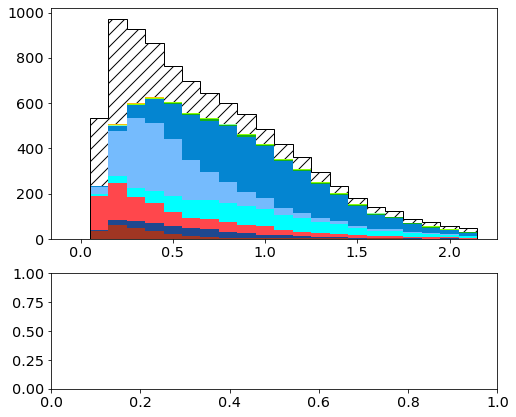

In [43]:
for which_variables in variables_set:
    this_folder = ls.plots_path+'PELEE_two_showers_sideband_unblinding/'
    this_folder += 'with_pi0_scaling/'
    this_folder += (which_variables + '/')
    !mkdir -p $this_folder
    
    this_query = PRESQ_twoplus
    this_title = 'Two+ showers sideband\n' + r'$\nu_e$ preselection and N-showers contained >= 2' + '\n' + r'$\pi^0$ scaled by 0.759'

    if no_data:
        this_query += ' and bnbdata==0'
    
    print(which_variables)
    this_plot_variables = plot_variables[which_variables]

    for VARIABLE, BINS, RANGE, XTIT in this_plot_variables:
        print(VARIABLE, BINS, RANGE, XTIT)
        fig, ax1, ax2 = my_plotter.plot_variable(
            VARIABLE,   
            query=this_query,
            kind="event_category",
            draw_sys=True,
            stacksort=3,
            title=XTIT,
            bins=BINS,
            range=RANGE,
        )[0:3]
        
        if no_leg:
            ax1.legend().set_visible(False) 
            if VARIABLE in database_ylim.keys():
                ax1.set_ylim(0, database_ylim[VARIABLE])
        else:
            ax1.set_title(this_title, loc='left')
            if VARIABLE in database_ylim.keys():
                ax1.set_ylim(0, database_ylim[VARIABLE])
            else:
                ax1.set_ylim(0, ax1.get_ylim()[1]*1.6)
            
        plt.tight_layout()
        save_path = this_folder+VARIABLE
        if no_leg:
            save_path += '_noleg'
        fig.savefig(save_path + '.png', dpi=250)    
#         fig.savefig(save_path + '.pdf') 
        plt.close()

# With detector systematics

counting_err: [ 4.59779749  6.85981637  9.37180093 14.74707095 15.89690195 12.54459485
 11.10162244 13.18436233 12.44890149  9.42036579  7.17941091  6.18830828
  5.11796293  4.24167698  3.87702155  3.36521442  3.09230795  2.69715802
  2.32929599  1.96458362]
detsys_err: [ 12.40627779  24.07396492  50.30583912 100.31212957  94.70263402
  73.62594696  57.2113313  222.27676617 167.72594743 110.47457105
  53.57184064  40.60727721  34.73879451  20.01035418  23.89537381
  20.59658036  15.25675676   9.54189971   8.19187202   5.95054432]
total exp_err :  [ 13.23085297  25.03223657  51.17136017 101.39033209  96.02760219
  74.68699302  58.27849045 222.66743855 168.1873021  110.87548936
  54.0507729   41.07610159  35.11377776  20.45497734  24.2078538
  20.86968592  15.56698414   9.91577085   8.5165948    6.26646364]


NameError: name 'save_path' is not defined

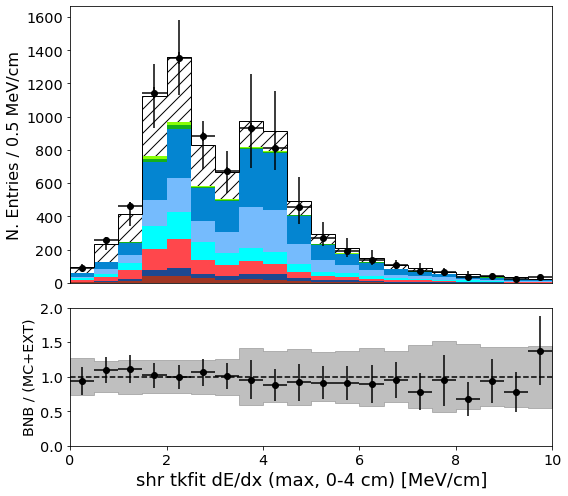

In [28]:
#dedx after far energy
detsys = {
    'nue': [1.27647279, 0.30363571, 0.38239875, 0.30185093, 0.25290227, 0.16252713,
 0.14619229, 0.15608208, 0.1666133,  0.25468685, 0.07858252, 0.19893852,
 0.25641127, 0.38413905, 0.2106816,  0.17191569, 0.45140248, 0.18510883,
 0.63619039, 0.43327993,],

    'ncpi0': [0.26039416, 0.26278514, 0.30491969, 0.1812784,  0.13276332, 0.17456273,
 0.14327807, 0.30043894, 0.22668279, 0.3052821,  0.26732865, 0.27633069,
 0.35367288, 0.29618235, 0.44247323, 0.54736577, 0.42008001, 0.3981663,
 0.42393282, 0.36643562,],

    'ccpi0': [0.26039416, 0.26278514, 0.30491969, 0.1812784,  0.13276332, 0.17456273,
 0.14327807, 0.30043894, 0.22668279, 0.3052821,  0.26732865, 0.27633069,
 0.35367288, 0.29618235, 0.44247323, 0.54736577, 0.42008001, 0.3981663,
 0.42393282, 0.36643562,]

}

stage = 1
no_leg = True
# this_folder = ls.plots_path+'PELEE_far_sideband_unblinding/'
# this_folder += 'with_pi0_scaling/'
# this_folder += 'stage_{}/'.format(stage)
# !mkdir -p $this_folder

this_query = PRESQ_twoplus
this_title = 'Two+ showers sideband\n' + r'$\nu_e$ preselection and N-showers contained >= 2' + '\n' + r'$\pi^0$ scaled by 0.759'

VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',20,(0,10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]",

out = my_plotter.plot_variable(
    VARIABLE,   
    query=this_query,
    kind="event_category",
    draw_sys=True,
    detsys=detsys,
    stacksort=3,
    title=XTIT,
    bins=int(BINS),
    range=RANGE,
)
fig, ax1, ax2 = out[0:3]

if no_leg:
    ax1.legend().set_visible(False) 
else:
    ax1.set_title(this_title, loc='left')
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.6)

# ax1.set_yscale('log')
plt.tight_layout()
# save_path = this_folder+VARIABLE
# if no_leg:
#     save_path += '_noleg'
#             fig.savefig(save_path + '.png', dpi=250)    
#         fig.savefig(save_path + '.pdf')    
#             plt.close()

counting_err: [ 0.         11.38409415 15.18103959 13.67164826 12.91339549 11.55277317
 10.77911671 10.34846482 10.13647292  9.54318205  8.93924164  8.30468722
  7.72633107  6.93920745  6.21472304  5.50524881  4.77363878  4.56610096
  3.78722861  3.57866333  3.18807298  3.14515391]
detsys_err: [ 0.          7.41917639 62.00136002 29.5702429  20.67713474 34.05661529
 49.08809862 23.07677848 14.82751352 28.55794204 19.88475391  8.01980307
  7.44812578 13.06102531 10.9383107  15.49674278  9.71711065 12.80615919
 14.02901918  6.01032146  5.54863355  5.31295393]
total exp_err :  [ 0.         13.58829562 63.83284897 32.57780274 24.37826253 35.96275314
 50.25764402 25.29087641 17.96115922 30.1102703  21.80168524 11.54491538
 10.73176451 14.78996221 12.58051761 16.44557087 10.82635057 13.59584463
 14.5312243   6.99505506  6.39930806  6.1740969 ]
Error calculating the significance operands could not be broadcast together with shapes (22,) (21,) (22,) 


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:251: RuntimeWarning: invalid value encountered in true_divide
  return sum(num / den) / np.count_nonzero(data)


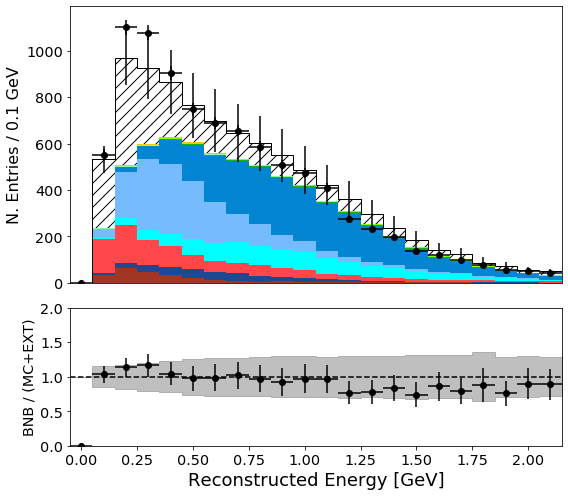

In [30]:
#dedx after far energy
detsys = {
    'nue': [       0.0, 0.86010721, 0.28074609, 0.15415369, 0.14866511, 0.13024779,
 0.03968399, 0.20109395, 0.06240319, 0.05555004, 0.07303715, 0.06233061,
 0.04176388, 0.09383196, 0.07945567, 0.14401069, 0.1034272,  0.11883343,
 0.08160861,0.11725796,0.10158504,0.12221902,
],

    'ncpi0': [0, 0.09882663, 0.18763546, 0.05706328, 0.0360522,  0.06301856,
 0.10416693, 0.04895403, 0.03464493, 0.07523434, 0.05874881, 0.02683672,
 0.02940983, 0.0624202,  0.07149102, 0.13125437, 0.11695622, 0.19981863,
 0.30545354, 0.16143183, 0.21489781, 0.28976165,],

    'ccpi0': [0, 0.09882663, 0.18763546, 0.05706328, 0.0360522,  0.06301856,
 0.10416693, 0.04895403, 0.03464493, 0.07523434, 0.05874881, 0.02683672,
 0.02940983, 0.0624202,  0.07149102, 0.13125437, 0.11695622, 0.19981863,
 0.30545354, 0.16143183, 0.21489781, 0.28976165,],

}

stage = 1
no_leg = True
# this_folder = ls.plots_path+'PELEE_far_sideband_unblinding/'
# this_folder += 'with_pi0_scaling/'
# this_folder += 'stage_{}/'.format(stage)
# !mkdir -p $this_folder

this_query = PRESQ_twoplus
this_title = 'Two+ showers sideband\n' + r'$\nu_e$ preselection and N-showers contained >= 2' + '\n' + r'$\pi^0$ scaled by 0.759'

VARIABLE, BINS, RANGE, XTIT = 'reco_e',22,(-0.05,2.15),r"Reconstructed Energy [GeV]"

out = my_plotter.plot_variable(
    VARIABLE,   
    query=this_query,
    kind="event_category",
    draw_sys=True,
    detsys=detsys,
    stacksort=3,
    title=XTIT,
    bins=int(BINS),
    range=RANGE,
)
fig, ax1, ax2 = out[0:3]

if no_leg:
    ax1.legend().set_visible(False) 
else:
    ax1.set_title(this_title, loc='left')
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.6)

# ax1.set_yscale('log')
plt.tight_layout()
# save_path = this_folder+VARIABLE
# if no_leg:
#     save_path += '_noleg'
#             fig.savefig(save_path + '.png', dpi=250)    
#         fig.savefig(save_path + '.pdf')    
#             plt.close()

# Study Np selection on the 2+ shower sideband

In [39]:
no_data = False
no_leg = False

In [40]:
variables_set = []
variables_set.append('insensitive_variables')
variables_set.append('input_bdt')
variables_set.append('bdt_scores')

In [43]:
database_ylim = {}
for stage in range(1, 4):        
    for which_variables in variables_set:
        this_folder = ls.plots_path+'PELEE_two_showers_sideband_unblinding/'
        if no_data:
            this_folder += 'dry_run/'
        else:
            this_folder += 'with_data/'
        this_folder += 'stage_{}/'.format(stage)
        this_folder += (which_variables + '/')
        !mkdir -p $this_folder

        this_query = stages_queries_two_plus_showers[stage]
        this_title = 'Two+ showers sideband\n' + r'$\nu_e$ preselection and N-showers contained >= 2' + '\n' + r'$\pi^0$ scaled by 0.759' + '\n' + stages_titles_two_plus_showers[stage]

        if no_data:
            this_query += ' and bnbdata==0'

        print(which_variables)
        this_plot_variables = plot_variables[which_variables]

        for VARIABLE, BINS, RANGE, XTIT in this_plot_variables:
            print(VARIABLE, BINS, RANGE, XTIT)
            fig, ax1, ax2 = my_plotter.plot_variable(
                VARIABLE,   
                query=this_query,
                kind="event_category",
                draw_sys=True,
                stacksort=3,
                title=XTIT,
                bins=BINS,
                range=RANGE,
            )[0:3]

            if no_leg:
                ax1.legend().set_visible(False) 
            else:
                ax1.set_title(this_title, loc='left')
                ax1.set_ylim(0, ax1.get_ylim()[1]*1.6)

            database_ylim[VARIABLE] = ax1.get_ylim()[1]
            plt.tight_layout()
            save_path = this_folder+VARIABLE
            if no_leg:
                save_path += '_noleg'
            fig.savefig(save_path + '.png', dpi=250)    
    #         fig.savefig(save_path + '.pdf')    
            plt.close()

insensitive_variables
n_showers_contained 10 (-0.5, 9.5) n showers contained
Error calculating the significance operands could not be broadcast together with shapes (10,) (8,) (10,) 
n_tracks_contained 6 (-0.5, 5.5) n tracks contained
Error calculating the significance operands could not be broadcast together with shapes (6,) (5,) (6,) 
trk_score 20 (0.5, 1.0) trk score
slclustfrac 20 (0, 1) slice clustered fraction
Error calculating the significance operands could not be broadcast together with shapes (20,) (16,) (20,) 
reco_nu_vtx_x 20 (0, 260) x
Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 
reco_nu_vtx_y 20 (-120, 120) y
Error calculating the significance operands could not be broadcast together with shapes (20,) (18,) (20,) 
reco_nu_vtx_z 20 (0, 1100) z
Error calculating the significance operands could not be broadcast together with shapes (20,) (18,) (20,) 
input_bdt
tksh_angle 20 (-1, 1) cos(tksh angle)
trkfit 9 (0, 0.5

/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:251: RuntimeWarning: divide by zero encountered in true_divide
  return sum(num / den) / np.count_nonzero(data)


reco_nu_vtx_x 20 (0, 260) x
Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 
reco_nu_vtx_y 20 (-120, 120) y
Error calculating the significance operands could not be broadcast together with shapes (20,) (18,) (20,) 
reco_nu_vtx_z 20 (0, 1100) z
Error calculating the significance operands could not be broadcast together with shapes (20,) (18,) (20,) 
input_bdt
tksh_angle 20 (-1, 1) cos(tksh angle)
Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 
trkfit 9 (0, 0.5) Fraction of Track-fitted points
shrmoliereavg 20 (0, 50) average Moliere angle [degrees]
tksh_distance 20 (0, 30) tksh distance [cm]
Error calculating the significance operands could not be broadcast together with shapes (20,) (7,) (20,) 
shr_tkfit_dedx_max 15 (0, 10) shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]
trkpid 21 (-1, 1) track LLR PID
Error calculating the significance operands could not be broadcast together wi